# Example : k fold cross-validation with an input file 

DeepBiome package takes microbiome abundance data as input and uses the phylogenetic taxonomy to guide the decision of the optimal number of layers and neurons in the deep learning architecture.

To use DeepBiome, you can experiment (1) __k times repetition__ or (2) __k fold cross-validation__.
For each experiment, we asuume that the dataset is given by
- __A list of k input files for k times repetition.__
- __One input file for k fold cross-validation.__

This notebook contains an example of (2) __k fold cross-validation__ for the deep neural netowrk using deepbiome.

## 1. Load library

First, we load the DeepBiome package. The DeepBiome package is built on the tensorflow and keras library

In [1]:
import os
import logging
import json
from pkg_resources import resource_filename

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from deepbiome import deepbiome

Using TensorFlow backend.


## 2. Prepare the dataset

In this example, we assume that we have __one input file for k times repetition.__

DeepBiome needs 3 data files as follows:
1. **the tree information**
1. **the input file**
1. **y**

For `k` fold cross-validation, we can use an input file.
In addition, we can set **the training index for each fold**. If we set the index file, DeepBiome build the training set for each fold based on each fold index in the index file. If not, DeepBiome will generate the index file locally.
        
Eath data should have the csv format as follow:

### Example of the tree information

First we need a file about the phylogenetic tree information. This tree information file should have the format below:

In [2]:
tree_information = pd.read_csv(resource_filename('deepbiome', 'tests/data/genus48_dic.csv'))
tree_information

Genus                           Family  \
0                   Streptococcus                 Streptococcaceae   
1                      Tropheryma                Cellulomonadaceae   
2                     Veillonella                  Veillonellaceae   
3                     Actinomyces                 Actinomycetaceae   
4                  Flavobacterium                Flavobacteriaceae   
5                      Prevotella                   Prevotellaceae   
6                   Porphyromonas               Porphyromonadaceae   
7                      Parvimonas  Clostridiales_Incertae_Sedis_XI   
8                   Fusobacterium                 Fusobacteriaceae   
9               Propionibacterium             Propionibacteriaceae   
10                        Gemella     Bacillales_Incertae_Sedis_XI   
11                         Rothia                   Micrococcaceae   
12                 Granulicatella                Carnobacteriaceae   
13                      Neisseria                    Neisseriaceae   
14                  Lactobacillus                 Lactobacillaceae   
15                    Megasphaera                  Veillonellaceae   
16                      Catonella                  Lachnospiraceae   
17                      Atopobium                Coriobacteriaceae   
18                  Campylobacter               Campylobacteraceae   
19                 Capnocytophaga                Flavobacteriaceae   
20                  Solobacterium              Erysipelotrichaceae   
21                       Moryella                  Lachnospiraceae   
22      TM7_genera_incertae_sedis        TM7_genera_incertae_sedis   
23                 Staphylococcus                Staphylococcaceae   
24                     Filifactor            Peptostreptococcaceae   
25                   Oribacterium                  Lachnospiraceae   
26                   Burkholderia                 Burkholderiaceae   
27                       Sneathia                 Leptotrichiaceae   
28                      Treponema                  Spirochaetaceae   
29                      Moraxella                    Moraxellaceae   
30                    Haemophilus                  Pasteurellaceae   
31                    Selenomonas                  Veillonellaceae   
32                Corynebacterium               Corynebacteriaceae   
33                      Rhizobium                     Rhizobiaceae   
34                 Bradyrhizobium                Bradyrhizobiaceae   
35               Methylobacterium              Methylobacteriaceae   
36      OD1_genera_incertae_sedis        OD1_genera_incertae_sedis   
37                     Finegoldia  Clostridiales_Incertae_Sedis_XI   
38                 Microbacterium                Microbacteriaceae   
39                   Sphingomonas                Sphingomonadaceae   
40               Chryseobacterium                Flavobacteriaceae   
41                    Bacteroides                   Bacteroidaceae   
42                   Bdellovibrio               Bdellovibrionaceae   
43                   Streptophyta                      Chloroplast   
44  Lachnospiracea_incertae_sedis                  Lachnospiraceae   
45                     Paracoccus                 Rhodobacteraceae   
46                 Fastidiosipila                  Ruminococcaceae   
47                 Pseudonocardia               Pseudonocardiaceae   

                        Order                      Class  \
0             Lactobacillales                    Bacilli   
1             Actinomycetales             Actinobacteria   
2             Selenomonadales              Negativicutes   
3             Actinomycetales             Actinobacteria   
4            Flavobacteriales              Flavobacteria   
5               Bacteroidales                Bacteroidia   
6               Bacteroidales                Bacteroidia   
7               Clostridiales                 Clostridia   
8             Fusobacteriales               Fusobacteria 

### Example of the input file

Below is an example of the input file.
This example has 1000 samples' microbiome abandunce.

In [3]:
x = pd.read_csv(resource_filename('deepbiome', 'tests/data/onefile_x.csv'))
x.head()

Streptococcus  Tropheryma  Veillonella  Actinomyces  Flavobacterium  \
0            841           0          813          505               5   
1           1445           0            1          573               0   
2           1259           0          805          650               0   
3            982           0          327          594               0   
4           1162           0          130          969             163   

   Prevotella  Porphyromonas  Parvimonas  Fusobacterium  Propionibacterium  \
0        3224              0         362             11                 65   
1        1278             82          85             69                154   
2        1088              0           0             74                  0   
3         960             81          19              9                  0   
4        1515            167           4            162                  3   

   ...  Microbacterium  Sphingomonas  Chryseobacterium  Bacteroides  \
0  ...               0            87                 0            0   
1  ...               0             1                 2            0   
2  ...               0             2                 8            1   
3  ...             157             1                 0            4   
4  ...               0             9                 0            0   

   Bdellovibrio  Streptophyta  Lachnospiracea_incertae_sedis  Paracoccus  \
0             0             0                              0           0   
1             0             0                              0           0   
2            39             0                              0           0   
3            60             0                              0           0   
4             0             0                             60           0   

   Fastidiosipila  Pseudonocardia  
0               0            2133  
1               0            3638  
2               0            3445  
3               0            3507  
4               0            3945  

[5 rows x 48 columns]

In [4]:
x.tail()

Streptococcus  Tropheryma  Veillonella  Actinomyces  Flavobacterium  \
995           1401           4           30          526               0   
996           2655           6          106           74               0   
997            335           0           71          259              67   
998            649          69          966         1227               0   
999           1258           0            0         1119               0   

     Prevotella  Porphyromonas  Parvimonas  Fusobacterium  Propionibacterium  \
995         923             25           0            127                  0   
996         952             76          13            158                125   
997         718              1           4              4                167   
998         508              2          30            550                  0   
999        2348             25           0            137                176   

     ...  Microbacterium  Sphingomonas  Chryseobacterium  Bacteroides  \
995  ...               0             0                 7            0   
996  ...               0             2                 0            0   
997  ...               0           246                 0            0   
998  ...               0             0                 0            0   
999  ...               0             2                 0            0   

     Bdellovibrio  Streptophyta  Lachnospiracea_incertae_sedis  Paracoccus  \
995             0             0                              0           0   
996             0             0                              0           0   
997             6             0                              0           0   
998             0             6                              0           0   
999             0             0                              0           0   

     Fastidiosipila  Pseudonocardia  
995               0            4470  
996               0            2826  
997               0            6527  
998               0            4402  
999               0            2585  

[5 rows x 48 columns]

### Example of the Y (regression)

This is an example of the output file for regression problem.

In [5]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/onefile_regression_y.csv'))
y.head()

x1
0  4.997270
1  5.004092
2  5.485126
3  5.489590
4  1.500001

In [6]:
y.tail()

x1
995  2.609926
996  5.488959
997  3.498418
998  5.486107
999  5.319623

For one repetition, the deepbiome will use the one column.

In [7]:
y.iloc[:,0].head()

0    4.997270
1    5.004092
2    5.485126
3    5.489590
4    1.500001
Name: x1, dtype: float64

In [8]:
y.iloc[:,0].tail()

995    2.609926
996    5.488959
997    3.498418
998    5.486107
999    5.319623
Name: x1, dtype: float64

### Example of the Y (classification)

This is an example of the output file for classification problem. Below example file has 1000 samples in rows, 1000 repetition in columns.

In [9]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/onefile_classification_y.csv'))
y.head()

V1
0  1.0
1  1.0
2  0.0
3  0.0
4  1.0

In [10]:
y.tail()

V1
995  1.0
996  0.0
997  1.0
998  0.0
999  1.0

For one repetition, DeepBiome will use the one column.

In [11]:
y.iloc[:,0].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: V1, dtype: float64

In [12]:
y.iloc[:,0].tail()

995    1.0
996    0.0
997    1.0
998    0.0
999    1.0
Name: V1, dtype: float64

### Exmple of the training index file for `k` fold cross-validation

For each fold, we have to set the training and test set. If the index file is given, DeepBiome sets the training set and test set based on the index file for 5 fold cross-validation. Below is the example of the index file. Each column has the training indices for each fold. DeepBiome will only use the samples in this index set for training.

In [13]:
idxs = pd.read_csv(resource_filename('deepbiome', 'tests/data/onefile_idx.csv'), dtype=np.int)
idxs.head()

0  1  2  3  4
0  0  0  2  0  0
1  1  1  3  1  1
2  2  2  4  2  3
3  5  3  6  3  4
4  6  4  8  4  5

In [14]:
idxs.tail()

0    1    2    3    4
795  993  995  993  994  995
796  994  996  994  995  996
797  996  997  995  996  997
798  998  998  997  997  998
799  999  999  998  999  999

Below is the index set for 1st fold. From 1000 samples above, it uses 800 samples for training.

In [15]:
idxs.iloc[:,0].head()

0    0
1    1
2    2
3    5
4    6
Name: 0, dtype: int64

In [16]:
idxs.iloc[:,0].tail()

795    993
796    994
797    996
798    998
799    999
Name: 0, dtype: int64

## 3. Prepare the configuration

For detailed configuration, we can build the configuration information for the network training by:
1. the python dictionary format
1. the configufation file (.cfg).

In this notebook, we show the python dictionary format configuration.

Please check the detailed information about each option in the [documantation](https://young-won.github.io/deepbiome/prerequisites.html#configuration)

### For preparing the configuration about the network information (`network_info`)

To give the information about the training process, we provide a dictionary of configurations to the `netowrk_info` field.
Your configuration for the network training should include the information about:

In [17]:
network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'lr': '0.01',
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'taxa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure',
        'network_class': 'DeepBiomeNetwork',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'normalizer': 'normalize_minmax',
    },
    'training_info': {
        'batch_size': '50', 
        'epochs': '100'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

### For preparing the configuration about the path information (`path_info`)

To give the information about the path of dataset, paths for saving the trained weights and the evaluation results, you have to provide a dictionary for configuration to the `path_info` feild.
Your configuration for the path information should include the information about:

In [18]:
path_info = {
    'data_info': {
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/onefile_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': 'onefile_x.csv',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'history': 'hist.json',
        'model_dir': './example_result/',
        'weight': 'weight.h5'
    }
}

## 4. Deepbiome Training

Now we can train the DeepBiome network based on the configurations.

For logging, we used the python logging library.

In [19]:
logging.basicConfig(format = '[%(name)-8s|%(levelname)s|%(filename)s:%(lineno)s] %(message)s',
                    level=logging.DEBUG)
log = logging.getLogger()

The deeobiome_train function provide the test evaluation, train evaluation and the deepbiome network instance.

If we set `number_of_fold`, then DeepBiome performs cross-validation based on that value. If not, DeepBiome package performs cross-validation based on the index file. If both `number_of_fold` option and the index file are missing, then the library performs leave-one-out-cross-validation (LOOCV).

In [20]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, network_info, path_info, number_of_fold=3)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:510] Phylogenetic tree level list: ['Ge

Instructions for updating:
Colocations handled automatically by placer.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/resource_variable_ops.py:432: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[root    |INFO|build_network.py:640] ------------------------------------------------------------------------------------------


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Instructions for updating:
Use tf.cast instead.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:2862: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 1s 1ms/step - loss: 0.6749 - binary_accuracy: 0.6609 - sensitivity: 0.9231 - specificity: 0.0769 - gmeasure: 0.0000e+00 - auc: 0.5002 - val_loss: 0.6493 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5616
Epoch 2/100
640/640 [==============================] - 0s 214us/step - loss: 0.6394 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5082 - val_loss: 0.6155 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5117
Epoch 3/100
640/640 [==============================] - 0s 216us/step - loss: 0.6254 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5127 - val_loss: 0.6109 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 

Epoch 25/100
640/640 [==============================] - 0s 222us/step - loss: 0.6250 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5258 - val_loss: 0.6114 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5235
Epoch 26/100
640/640 [==============================] - 0s 210us/step - loss: 0.6250 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5178 - val_loss: 0.6112 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5441
Epoch 27/100
640/640 [==============================] - 0s 200us/step - loss: 0.6247 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5305 - val_loss: 0.6117 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

640/640 [==============================] - 0s 211us/step - loss: 0.6248 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5629 - val_loss: 0.6117 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5550
Epoch 49/100
640/640 [==============================] - 0s 213us/step - loss: 0.6248 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5541 - val_loss: 0.6114 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5509
Epoch 50/100
640/640 [==============================] - 0s 214us/step - loss: 0.6250 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5569 - val_loss: 0.6112 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.00

Epoch 72/100
640/640 [==============================] - 0s 215us/step - loss: 0.6253 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5988 - val_loss: 0.6113 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6014
Epoch 73/100
640/640 [==============================] - 0s 225us/step - loss: 0.6252 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6014 - val_loss: 0.6120 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5959
Epoch 74/100
640/640 [==============================] - 0s 218us/step - loss: 0.6250 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6122 - val_loss: 0.6117 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 96/100
640/640 [==============================] - 0s 224us/step - loss: 0.5515 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7700 - val_loss: 0.5397 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7101
Epoch 97/100
640/640 [==============================] - 0s 204us/step - loss: 0.5422 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7652 - val_loss: 0.5275 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7131
Epoch 98/100
640/640 [==============================] - 0s 223us/step - loss: 0.5368 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7796 - val_loss: 0.5220 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

[root    |INFO|build_network.py:143] Training end with time 16.51238703727722!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_0.json
[root    |INFO|build_network.py:169] Evaluation start!


800/800 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.015098810195922852!
[root    |INFO|build_network.py:175] Evaluation: [0.5201159119606018, 0.6862499713897705, 1.0, 0.0, 0.0, 0.7842437028884888]
[root    |INFO|build_network.py:169] Evaluation start!


201/201 [==============================] - 0s 26us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.01297307014465332!
[root    |INFO|build_network.py:175] Evaluation: [0.5442847013473511, 0.6915422677993774, 1.0, 0.0, 0.0, 0.7287073731422424]
[root    |INFO|deepbiome.py:179] Compute time : 19.35059142112732
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.py:505] ----------------------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 752us/step - loss: 0.6658 - binary_accuracy: 0.6516 - sensitivity: 0.9231 - specificity: 0.0769 - gmeasure: 0.0000e+00 - auc: 0.4946 - val_loss: 0.6060 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5807
Epoch 2/100
640/640 [==============================] - 0s 216us/step - loss: 0.6139 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5009 - val_loss: 0.5655 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5581
Epoch 3/100
640/640 [==============================] - 0s 225us/step - loss: 0.6118 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5838 - val_loss: 0.5638 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.000

Epoch 25/100
640/640 [==============================] - 0s 215us/step - loss: 0.6117 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5646 - val_loss: 0.5652 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4493
Epoch 26/100
640/640 [==============================] - 0s 209us/step - loss: 0.6089 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5724 - val_loss: 0.5690 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4474
Epoch 27/100
640/640 [==============================] - 0s 223us/step - loss: 0.6095 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5689 - val_loss: 0.5702 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 49/100
640/640 [==============================] - 0s 210us/step - loss: 0.6053 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5740 - val_loss: 0.5782 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4572
Epoch 50/100
640/640 [==============================] - 0s 210us/step - loss: 0.6050 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5623 - val_loss: 0.5728 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4566
Epoch 51/100
640/640 [==============================] - 0s 221us/step - loss: 0.6040 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5800 - val_loss: 0.5760 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 73/100
640/640 [==============================] - 0s 214us/step - loss: 0.5994 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6149 - val_loss: 0.5746 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4569
Epoch 74/100
640/640 [==============================] - 0s 214us/step - loss: 0.5997 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6064 - val_loss: 0.5741 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4575
Epoch 75/100
640/640 [==============================] - 0s 214us/step - loss: 0.5998 - binary_accuracy: 0.7016 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6130 - val_loss: 0.5760 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 97/100
640/640 [==============================] - 0s 192us/step - loss: 0.5941 - binary_accuracy: 0.7016 - sensitivity: 0.9976 - specificity: 0.0051 - gmeasure: 0.0199 - auc: 0.6412 - val_loss: 0.5885 - val_binary_accuracy: 0.7437 - val_sensitivity: 0.9937 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4813
Epoch 98/100
640/640 [==============================] - 0s 192us/step - loss: 0.5914 - binary_accuracy: 0.7031 - sensitivity: 1.0000 - specificity: 0.0045 - gmeasure: 0.0187 - auc: 0.6512 - val_loss: 0.5741 - val_binary_accuracy: 0.7500 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4848
Epoch 99/100
640/640 [==============================] - 0s 214us/step - loss: 0.5888 - binary_accuracy: 0.7016 - sensitivity: 0.9980 - specificity: 0.0043 - gmeasure: 0.0181 - auc: 0.6400 - val_loss: 0.5830 - val_binary_accuracy: 0.7437 - val_sensitivity: 0.9937 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - va

[root    |INFO|build_network.py:143] Training end with time 15.50827431678772!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_1.json
[root    |INFO|build_network.py:169] Evaluation start!


800/800 [==============================] - 0s 5us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.01117086410522461!
[root    |INFO|build_network.py:175] Evaluation: [0.5856000185012817, 0.7099999785423279, 0.9964850544929504, 0.0043290043249726295, 0.06567943096160889, 0.6182411909103394]
[root    |INFO|build_network.py:169] Evaluation start!


201/201 [==============================] - 0s 19us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010822296142578125!
[root    |INFO|build_network.py:175] Evaluation: [0.5753821730613708, 0.7562189102172852, 1.0, 0.0, 0.0, 0.5248388648033142]
[root    |INFO|deepbiome.py:179] Compute time : 16.846028566360474
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------3 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 3 simulation
[root    |INFO|build_network.py:505] --------------------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 1s 785us/step - loss: 0.6634 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5278 - val_loss: 0.6307 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5970
Epoch 2/100
640/640 [==============================] - 0s 193us/step - loss: 0.6192 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5265 - val_loss: 0.6261 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5969
Epoch 3/100
640/640 [==============================] - 0s 213us/step - loss: 0.6209 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5314 - val_loss: 0.6209 - val_binary_accuracy: 0.6875 - val_sensitivity: 1

Epoch 25/100
640/640 [==============================] - 0s 220us/step - loss: 0.6178 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5952 - val_loss: 0.6209 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6414
Epoch 26/100
640/640 [==============================] - 0s 211us/step - loss: 0.6168 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5889 - val_loss: 0.6203 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6434
Epoch 27/100
640/640 [==============================] - 0s 223us/step - loss: 0.6176 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5859 - val_loss: 0.6203 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 49/100
640/640 [==============================] - 0s 217us/step - loss: 0.6053 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6176 - val_loss: 0.6240 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5758
Epoch 50/100
640/640 [==============================] - 0s 211us/step - loss: 0.6062 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6218 - val_loss: 0.6240 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5800
Epoch 51/100
640/640 [==============================] - 0s 219us/step - loss: 0.6071 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6193 - val_loss: 0.6252 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 73/100
640/640 [==============================] - 0s 218us/step - loss: 0.5834 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6815 - val_loss: 0.6396 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5916
Epoch 74/100
640/640 [==============================] - 0s 220us/step - loss: 0.5794 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6800 - val_loss: 0.6396 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5911
Epoch 75/100
640/640 [==============================] - 0s 217us/step - loss: 0.5844 - binary_accuracy: 0.6922 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6839 - val_loss: 0.6393 - val_binary_accuracy: 0.6875 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 98/100
640/640 [==============================] - 0s 202us/step - loss: 0.5684 - binary_accuracy: 0.7063 - sensitivity: 0.9781 - specificity: 0.0990 - gmeasure: 0.2657 - auc: 0.6997 - val_loss: 0.6592 - val_binary_accuracy: 0.6875 - val_sensitivity: 0.9353 - val_specificity: 0.1461 - val_gmeasure: 0.3463 - val_auc: 0.5785
Epoch 99/100
640/640 [==============================] - 0s 195us/step - loss: 0.5668 - binary_accuracy: 0.7172 - sensitivity: 0.9718 - specificity: 0.1426 - gmeasure: 0.3298 - auc: 0.7069 - val_loss: 0.6665 - val_binary_accuracy: 0.6875 - val_sensitivity: 0.9710 - val_specificity: 0.1348 - val_gmeasure: 0.3353 - val_auc: 0.5880
Epoch 100/100
640/640 [==============================] - 0s 211us/step - loss: 0.5652 - binary_accuracy: 0.7156 - sensitivity: 0.9774 - specificity: 0.1299 - gmeasure: 0.3353 - auc: 0.7003 - val_loss: 0.6640 - val_binary_accuracy: 0.6812 - val_sensitivity: 0.9353 - val_specificity: 0.1348 - val_gmeasure: 0.3246 - val_auc: 0.5761


[root    |INFO|build_network.py:143] Training end with time 15.530826568603516!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_2.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_2.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_2.json
[root    |INFO|build_network.py:169] Evaluation start!


800/800 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.013373851776123047!
[root    |INFO|build_network.py:175] Evaluation: [0.5819013714790344, 0.7099999785423279, 0.9819168448448181, 0.10121457278728485, 0.31525275111198425, 0.6671669483184814]
[root    |INFO|build_network.py:169] Evaluation start!


200/200 [==============================] - 0s 18us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010436296463012695!
[root    |INFO|build_network.py:175] Evaluation: [0.7333670854568481, 0.6399999856948853, 0.9338235259056091, 0.015625, 0.1207931786775589, 0.43669578433036804]
[root    |INFO|deepbiome.py:179] Compute time : 16.87532639503479
[root    |INFO|deepbiome.py:180] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.5625391  0.70208331 0.99280063 0.03518119 0.12697739 0.68988395]
[root    |INFO|deepbiome.py:189]        std : [0.0300357  0.01119586 0.00782864 0.04672609 0.13580416 0.06964795]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:192] Test E

The `deepbiome_train` saves the trained model weights, evaluation results and history based on the path information from the configuration.

From the example above, we can check that `hist_*.json`, `weight_*.h5`, `test_eval.npy`, `train_eval.npy` files were saved.

In [21]:
os.listdir(path_info['model_info']['model_dir'])

['hist_0.json',
 'weight_2.h5',
 'test_eval.npy',
 'weight_0.h5',
 'train_eval.npy',
 'hist_2.json',
 'weight_1.h5',
 'hist_1.json']

Lets check the history files.

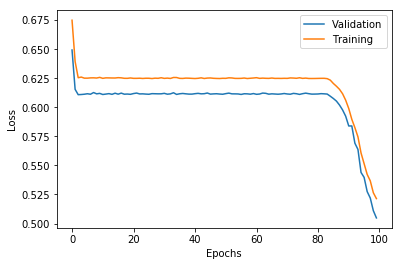

In [22]:
with open('./%s/hist_0.json' % path_info['model_info']['model_dir'], 'r') as f:
    history = json.load(f)
    
plt.plot(history['val_loss'], label='Validation')
plt.plot(history['loss'], label='Training')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Test evauation and train evauation is the numpy array of the shape (number of fold, number of evaluation measures).

In [23]:
test_evaluation

array([[0.5442847 , 0.69154227, 1.        , 0.        , 0.        ,
        0.72870737],
       [0.57538217, 0.75621891, 1.        , 0.        , 0.        ,
        0.52483886],
       [0.73336709, 0.63999999, 0.93382353, 0.015625  , 0.12079318,
        0.43669578]])

In [24]:
train_evaluation

array([[0.52011591, 0.68624997, 1.        , 0.        , 0.        ,
        0.7842437 ],
       [0.58560002, 0.70999998, 0.99648505, 0.004329  , 0.06567943,
        0.61824119],
       [0.58190137, 0.70999998, 0.98191684, 0.10121457, 0.31525275,
        0.66716695]])

## 5. Load the pre-trained network for training

If you have a pre-trianed model, you warm_start next training using the pre-trained weights by setting the `warm_start` option in `training_info` to `True`. The file path of the pre-trained weights passed in the `warm_start_model` option. Below is the example:

In [25]:
warm_start_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'training_info': {
        'warm_start':'True',
        'warm_start_model':'./example_result/weight.h5',
        'batch_size': '200',
        'epochs': '100'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [26]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, warm_start_network_info, path_info, 
                                                                       number_of_fold=3)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:510] Phylogenetic tree level list: ['Ge

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_0.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 674us/step - loss: 0.5209 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7779 - val_loss: 0.5028 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7387
Epoch 2/100
640/640 [==============================] - 0s 66us/step - loss: 0.5136 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7949 - val_loss: 0.4982 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7396
Epoch 3/100
640/640 [==============================] - 0s 79us/step - loss: 0.5125 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7776 - val_loss: 0.4973 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0

Epoch 25/100
640/640 [==============================] - 0s 71us/step - loss: 0.4863 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7667 - val_loss: 0.4769 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7401
Epoch 26/100
640/640 [==============================] - 0s 72us/step - loss: 0.4855 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8206 - val_loss: 0.4781 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7400
Epoch 27/100
640/640 [==============================] - ETA: 0s - loss: 0.5126 - binary_accuracy: 0.6550 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.78 - 0s 70us/step - loss: 0.4832 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000

640/640 [==============================] - 0s 71us/step - loss: 0.4742 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8113 - val_loss: 0.4914 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7372
Epoch 49/100
640/640 [==============================] - 0s 77us/step - loss: 0.4729 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8270 - val_loss: 0.5000 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7347
Epoch 50/100
640/640 [==============================] - 0s 75us/step - loss: 0.4744 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7766 - val_loss: 0.5018 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e

Epoch 72/100
640/640 [==============================] - 0s 71us/step - loss: 0.4621 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8143 - val_loss: 0.5125 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7435
Epoch 73/100
640/640 [==============================] - 0s 64us/step - loss: 0.4618 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8235 - val_loss: 0.5155 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7418
Epoch 74/100
640/640 [==============================] - 0s 67us/step - loss: 0.4628 - binary_accuracy: 0.6828 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8044 - val_loss: 0.5218 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmea

640/640 [==============================] - 0s 77us/step - loss: 0.4521 - binary_accuracy: 0.7125 - sensitivity: 0.9777 - specificity: 0.1337 - gmeasure: 0.3382 - auc: 0.8257 - val_loss: 0.5194 - val_binary_accuracy: 0.7188 - val_sensitivity: 0.9107 - val_specificity: 0.2708 - val_gmeasure: 0.4966 - val_auc: 0.7539
Epoch 97/100
640/640 [==============================] - 0s 71us/step - loss: 0.4514 - binary_accuracy: 0.7453 - sensitivity: 0.7774 - specificity: 0.6043 - gmeasure: 0.6771 - auc: 0.8082 - val_loss: 0.5154 - val_binary_accuracy: 0.6750 - val_sensitivity: 0.6339 - val_specificity: 0.7708 - val_gmeasure: 0.6990 - val_auc: 0.7567
Epoch 98/100
640/640 [==============================] - 0s 72us/step - loss: 0.4531 - binary_accuracy: 0.6812 - sensitivity: 0.5464 - specificity: 0.8844 - gmeasure: 0.6935 - auc: 0.8090 - val_loss: 0.5233 - val_binary_accuracy: 0.7000 - val_sensitivity: 0.6964 - val_specificity: 0.7083 - val_gmeasure: 0.7024 - val_auc: 0.7561
Epoch 99/100
640/640 [====

[root    |INFO|build_network.py:143] Training end with time 6.599108457565308!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_0.json
[root    |INFO|build_network.py:169] Evaluation start!


800/800 [==============================] - 0s 6us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.011509180068969727!
[root    |INFO|build_network.py:175] Evaluation: [0.46618956327438354, 0.6974999904632568, 0.994535505771637, 0.04780876636505127, 0.2180539220571518, 0.8145197033882141]
[root    |INFO|build_network.py:169] Evaluation start!


201/201 [==============================] - 0s 24us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.012199163436889648!
[root    |INFO|build_network.py:175] Evaluation: [0.5137165784835815, 0.6865671873092651, 0.9928057789802551, 0.0, 0.0, 0.7464609146118164]
[root    |INFO|deepbiome.py:179] Compute time : 8.093743562698364
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.py:505] ------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_1.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 663us/step - loss: 0.5891 - binary_accuracy: 0.7016 - sensitivity: 0.9982 - specificity: 0.0050 - gmeasure: 0.0354 - auc: 0.6714 - val_loss: 0.5786 - val_binary_accuracy: 0.7437 - val_sensitivity: 0.9917 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4944
Epoch 2/100
640/640 [==============================] - 0s 70us/step - loss: 0.5871 - binary_accuracy: 0.7016 - sensitivity: 0.9983 - specificity: 0.0043 - gmeasure: 0.0328 - auc: 0.6247 - val_loss: 0.5779 - val_binary_accuracy: 0.7437 - val_sensitivity: 0.9917 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4956
Epoch 3/100
640/640 [==============================] - 0s 73us/step - loss: 0.5864 - binary_accuracy: 0.7031 - sensitivity: 1.0000 - specificity: 0.0042 - gmeasure: 0.0323 - auc: 0.6933 - val_loss: 0.5778 - val_binary_accuracy: 0.7437 - val_sensitivity: 0.9917 - val_specificity: 0

640/640 [==============================] - 0s 75us/step - loss: 0.5807 - binary_accuracy: 0.7063 - sensitivity: 0.9983 - specificity: 0.0166 - gmeasure: 0.0886 - auc: 0.6842 - val_loss: 0.5820 - val_binary_accuracy: 0.7250 - val_sensitivity: 0.9667 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5125
Epoch 26/100
640/640 [==============================] - 0s 74us/step - loss: 0.5821 - binary_accuracy: 0.7109 - sensitivity: 0.9882 - specificity: 0.0622 - gmeasure: 0.2113 - auc: 0.6536 - val_loss: 0.5853 - val_binary_accuracy: 0.7250 - val_sensitivity: 0.9667 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5108
Epoch 27/100
640/640 [==============================] - 0s 76us/step - loss: 0.5795 - binary_accuracy: 0.7125 - sensitivity: 0.9948 - specificity: 0.0723 - gmeasure: 0.2583 - auc: 0.6691 - val_loss: 0.5801 - val_binary_accuracy: 0.7375 - val_sensitivity: 0.9833 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5096
Ep

640/640 [==============================] - 0s 74us/step - loss: 0.5771 - binary_accuracy: 0.7141 - sensitivity: 0.9965 - specificity: 0.0629 - gmeasure: 0.2349 - auc: 0.6547 - val_loss: 0.5784 - val_binary_accuracy: 0.7312 - val_sensitivity: 0.9750 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5223
Epoch 50/100
640/640 [==============================] - 0s 65us/step - loss: 0.5761 - binary_accuracy: 0.7109 - sensitivity: 0.9827 - specificity: 0.0856 - gmeasure: 0.2733 - auc: 0.7132 - val_loss: 0.5806 - val_binary_accuracy: 0.7312 - val_sensitivity: 0.9750 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5204
Epoch 51/100
640/640 [==============================] - 0s 64us/step - loss: 0.5743 - binary_accuracy: 0.7125 - sensitivity: 0.9824 - specificity: 0.0749 - gmeasure: 0.2661 - auc: 0.6541 - val_loss: 0.5793 - val_binary_accuracy: 0.7312 - val_sensitivity: 0.9750 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5179
Ep

Epoch 74/100
640/640 [==============================] - 0s 77us/step - loss: 0.5709 - binary_accuracy: 0.7156 - sensitivity: 0.9783 - specificity: 0.1172 - gmeasure: 0.3268 - auc: 0.6665 - val_loss: 0.5790 - val_binary_accuracy: 0.7375 - val_sensitivity: 0.9750 - val_specificity: 0.0250 - val_gmeasure: 0.1561 - val_auc: 0.5246
Epoch 75/100
640/640 [==============================] - 0s 70us/step - loss: 0.5709 - binary_accuracy: 0.7156 - sensitivity: 0.9803 - specificity: 0.0821 - gmeasure: 0.2711 - auc: 0.6550 - val_loss: 0.5802 - val_binary_accuracy: 0.7375 - val_sensitivity: 0.9750 - val_specificity: 0.0250 - val_gmeasure: 0.1561 - val_auc: 0.5252
Epoch 76/100
640/640 [==============================] - 0s 75us/step - loss: 0.5709 - binary_accuracy: 0.7203 - sensitivity: 0.9820 - specificity: 0.1108 - gmeasure: 0.3264 - auc: 0.6436 - val_loss: 0.5841 - val_binary_accuracy: 0.7375 - val_sensitivity: 0.9583 - val_specificity: 0.0750 - val_gmeasure: 0.2681 - val_auc: 0.5242
Epoch 77/100


Epoch 99/100
640/640 [==============================] - 0s 78us/step - loss: 0.5705 - binary_accuracy: 0.7297 - sensitivity: 0.9499 - specificity: 0.1702 - gmeasure: 0.3427 - auc: 0.6616 - val_loss: 0.5862 - val_binary_accuracy: 0.7563 - val_sensitivity: 0.9667 - val_specificity: 0.1250 - val_gmeasure: 0.3476 - val_auc: 0.5283
Epoch 100/100
640/640 [==============================] - 0s 72us/step - loss: 0.5662 - binary_accuracy: 0.7219 - sensitivity: 0.9588 - specificity: 0.1656 - gmeasure: 0.3946 - auc: 0.6885 - val_loss: 0.5808 - val_binary_accuracy: 0.7375 - val_sensitivity: 0.9750 - val_specificity: 0.0250 - val_gmeasure: 0.1561 - val_auc: 0.5273


[root    |INFO|build_network.py:143] Training end with time 6.688857316970825!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_1.json
[root    |INFO|build_network.py:169] Evaluation start!


800/800 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.012678146362304688!
[root    |INFO|build_network.py:175] Evaluation: [0.570883572101593, 0.7212499976158142, 0.9789103865623474, 0.08658009022474289, 0.29112565517425537, 0.647463858127594]
[root    |INFO|build_network.py:169] Evaluation start!


201/201 [==============================] - 0s 16us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.007781267166137695!
[root    |INFO|build_network.py:175] Evaluation: [0.5779709815979004, 0.7363184094429016, 0.9736841917037964, 0.0, 0.0, 0.5371912121772766]
[root    |INFO|deepbiome.py:179] Compute time : 8.250972747802734
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------3 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 3 simulation
[root    |INFO|build_network.py:505] ------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_2.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 660us/step - loss: 0.5650 - binary_accuracy: 0.7266 - sensitivity: 0.9654 - specificity: 0.2113 - gmeasure: 0.4428 - auc: 0.7229 - val_loss: 0.6797 - val_binary_accuracy: 0.6938 - val_sensitivity: 0.9909 - val_specificity: 0.0400 - val_gmeasure: 0.1991 - val_auc: 0.5236
Epoch 2/100
640/640 [==============================] - 0s 73us/step - loss: 0.5737 - binary_accuracy: 0.6984 - sensitivity: 0.9881 - specificity: 0.0226 - gmeasure: 0.0990 - auc: 0.7058 - val_loss: 0.6658 - val_binary_accuracy: 0.6875 - val_sensitivity: 0.9636 - val_specificity: 0.0800 - val_gmeasure: 0.2777 - val_auc: 0.5215
Epoch 3/100
640/640 [==============================] - 0s 70us/step - loss: 0.5645 - binary_accuracy: 0.7188 - sensitivity: 0.9565 - specificity: 0.1833 - gmeasure: 0.4017 - auc: 0.6556 - val_loss: 0.6630 - val_binary_accuracy: 0.6500 - val_sensitivity: 0.8364 - val_specificity: 0.2400 - val_gmea

Epoch 26/100
640/640 [==============================] - 0s 73us/step - loss: 0.5563 - binary_accuracy: 0.7250 - sensitivity: 0.9803 - specificity: 0.1501 - gmeasure: 0.3787 - auc: 0.6826 - val_loss: 0.6673 - val_binary_accuracy: 0.6812 - val_sensitivity: 0.9182 - val_specificity: 0.1600 - val_gmeasure: 0.3833 - val_auc: 0.5235
Epoch 27/100
640/640 [==============================] - 0s 75us/step - loss: 0.5582 - binary_accuracy: 0.7234 - sensitivity: 0.9565 - specificity: 0.1905 - gmeasure: 0.4226 - auc: 0.7148 - val_loss: 0.6666 - val_binary_accuracy: 0.6750 - val_sensitivity: 0.8818 - val_specificity: 0.2200 - val_gmeasure: 0.4405 - val_auc: 0.5244
Epoch 28/100
640/640 [==============================] - 0s 75us/step - loss: 0.5604 - binary_accuracy: 0.7219 - sensitivity: 0.9451 - specificity: 0.3207 - gmeasure: 0.5388 - auc: 0.7325 - val_loss: 0.6686 - val_binary_accuracy: 0.6812 - val_sensitivity: 0.9273 - val_specificity: 0.1400 - val_gmeasure: 0.3603 - val_auc: 0.5241
Epoch 29/100


Epoch 51/100
640/640 [==============================] - 0s 70us/step - loss: 0.5551 - binary_accuracy: 0.7219 - sensitivity: 0.9874 - specificity: 0.1362 - gmeasure: 0.3638 - auc: 0.7302 - val_loss: 0.6849 - val_binary_accuracy: 0.6938 - val_sensitivity: 0.9455 - val_specificity: 0.1400 - val_gmeasure: 0.3638 - val_auc: 0.5180
Epoch 52/100
640/640 [==============================] - 0s 73us/step - loss: 0.5536 - binary_accuracy: 0.7188 - sensitivity: 0.9394 - specificity: 0.2274 - gmeasure: 0.4483 - auc: 0.7008 - val_loss: 0.6787 - val_binary_accuracy: 0.6500 - val_sensitivity: 0.8636 - val_specificity: 0.1800 - val_gmeasure: 0.3943 - val_auc: 0.5195
Epoch 53/100
640/640 [==============================] - 0s 75us/step - loss: 0.5529 - binary_accuracy: 0.7125 - sensitivity: 0.9291 - specificity: 0.2071 - gmeasure: 0.4343 - auc: 0.7182 - val_loss: 0.6814 - val_binary_accuracy: 0.6875 - val_sensitivity: 0.9182 - val_specificity: 0.1800 - val_gmeasure: 0.4065 - val_auc: 0.5185
Epoch 54/100


Epoch 76/100
640/640 [==============================] - 0s 69us/step - loss: 0.5485 - binary_accuracy: 0.7312 - sensitivity: 0.9330 - specificity: 0.3051 - gmeasure: 0.5312 - auc: 0.7422 - val_loss: 0.6970 - val_binary_accuracy: 0.6875 - val_sensitivity: 0.9364 - val_specificity: 0.1400 - val_gmeasure: 0.3621 - val_auc: 0.5158
Epoch 77/100
640/640 [==============================] - 0s 70us/step - loss: 0.5551 - binary_accuracy: 0.7234 - sensitivity: 0.9791 - specificity: 0.1341 - gmeasure: 0.3589 - auc: 0.6884 - val_loss: 0.7067 - val_binary_accuracy: 0.6812 - val_sensitivity: 0.9455 - val_specificity: 0.1000 - val_gmeasure: 0.3075 - val_auc: 0.5149
Epoch 78/100
640/640 [==============================] - 0s 71us/step - loss: 0.5506 - binary_accuracy: 0.7266 - sensitivity: 0.9752 - specificity: 0.1484 - gmeasure: 0.3777 - auc: 0.7156 - val_loss: 0.6912 - val_binary_accuracy: 0.6625 - val_sensitivity: 0.8818 - val_specificity: 0.1800 - val_gmeasure: 0.3984 - val_auc: 0.5159
Epoch 79/100


[root    |INFO|build_network.py:143] Training end with time 6.652949571609497!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_2.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_2.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_2.json
[root    |INFO|build_network.py:169] Evaluation start!


800/800 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.012808561325073242!
[root    |INFO|build_network.py:175] Evaluation: [0.5787315368652344, 0.7174999713897705, 0.9602169990539551, 0.17408907413482666, 0.408856064081192, 0.6828048825263977]
[root    |INFO|build_network.py:169] Evaluation start!


200/200 [==============================] - 0s 17us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010796785354614258!
[root    |INFO|build_network.py:175] Evaluation: [0.7851572632789612, 0.6050000190734863, 0.8823529481887817, 0.015625, 0.11741705238819122, 0.42463234066963196]
[root    |INFO|deepbiome.py:179] Compute time : 8.323055028915405
[root    |INFO|deepbiome.py:180] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.53860156 0.71208332 0.97788763 0.10282598 0.30601188 0.71492948]
[root    |INFO|deepbiome.py:189]        std : [0.05130315 0.010425   0.01402912 0.05281809 0.07860265 0.07188373]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:192] Test 

Let's check the history plot again.

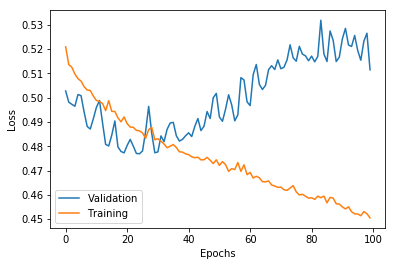

In [27]:
with open('./%s/hist_0.json' % path_info['model_info']['model_dir'], 'r') as f:
    history = json.load(f)
    
plt.plot(history['val_loss'], label='Validation')
plt.plot(history['loss'], label='Training')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 6. Load the pre-trained network for testing

To test the trained model, we can use the `deepbiome_test` function. If you use the index file, this function provides the evaluation using test index (index set not included in the index file) for each fold. If not, this function provides the evaluation using the whole samples. If `number_of_fold` is set to `k`, the function will test the model only with first `k` folds.

In [28]:
test_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'lr': '0.01',
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure',
        'network_class': 'DeepBiomeNetwork',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'normalizer': 'normalize_minmax',
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [29]:
test_path_info = {
    'data_info': {
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/onefile_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': 'onefile_x.csv',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'model_dir': './example_result/',
        'weight': 'weight.h5'
    }
}

In [30]:
evaluation = deepbiome.deepbiome_test(log, test_network_info, test_path_info, number_of_fold=3)

[root    |INFO|deepbiome.py:262] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:294] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:296] -------1 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 1 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:169] Evaluation start!


201/201 [==============================] - 0s 452us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.20798230171203613!
[root    |INFO|build_network.py:175] Evaluation: [0.5137165784835815, 0.6865671873092651, 0.9928057789802551, 0.0, 0.0, 0.7464609146118164]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.42946457862854
[root    |INFO|deepbiome.py:323] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:296] -------2 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 2 fold testing
[root    |INFO|build_network

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:169] Evaluation start!


201/201 [==============================] - 0s 336us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.1733410358428955!
[root    |INFO|build_network.py:175] Evaluation: [0.5779709815979004, 0.7363184094429016, 0.9736841917037964, 0.0, 0.0, 0.5371912121772766]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.478259563446045
[root    |INFO|deepbiome.py:323] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:296] -------3 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 3 fold testing
[root    |INFO|build_network

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:169] Evaluation start!


200/200 [==============================] - 0s 346us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.18228578567504883!
[root    |INFO|build_network.py:175] Evaluation: [0.7851572632789612, 0.6050000190734863, 0.8823529481887817, 0.015625, 0.11741705238819122, 0.42463234066963196]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.442732572555542
[root    |INFO|deepbiome.py:323] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:326] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:328] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:331]       mean : [0.62561494 0.67596187 0.94961431 0.00520833 0.03913902 0.56942816]
[root    |INFO|deepbiome.py:332]        std : [0.11582306 0.05413246 0.04819735 0.0073657  0.05535093 0.13334872]
[root    |INFO|deepbiome.py:333] -----------------------------------------------------------------
[root 

This function provide the evaluation result as a numpy array with a shape of (number of fold, number of evaluation measures).

In [31]:
print('      %s' % ''.join(['%16s'%'loss']+ ['%16s'%s.strip() for s in network_info['model_info']['metrics'].split(',')]))
print('Mean: %s' % ''.join(['%16.4f'%v for v in np.mean(evaluation, axis=0)]))
print('Std : %s' % ''.join(['%16.4f'%v for v in np.std(evaluation, axis=0)]))

                  loss binary_accuracy     sensitivity     specificity        gmeasure             auc
Mean:           0.6256          0.6760          0.9496          0.0052          0.0391          0.5694
Std :           0.1158          0.0541          0.0482          0.0074          0.0554          0.1333


## 7. Load the pre-trained network for prediction

If you want to predict using the pre-trained model, you can use the `deepbiome_prediction` function. If `number_of_fold` is setted as `k`, the function will predict only with first `k` folds sample's outputs.

In [32]:
prediction_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [33]:
prediction_path_info = {
    'data_info': {
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': 'onefile_x.csv',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'model_dir': './example_result/',
        'weight': 'weight_0.h5'
    }
}

In [34]:
prediction = deepbiome.deepbiome_prediction(log, prediction_network_info, prediction_path_info,
                                            num_classes = 1, number_of_fold=3)

[root    |INFO|deepbiome.py:393] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:420] -------1 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 1 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:510] Phylogenetic tree

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:189] Prediction start!


1000/1000 [==============================] - 0s 31us/step


[root    |INFO|build_network.py:194] Prediction end with time 0.03324389457702637!
[root    |INFO|deepbiome.py:444] Compute time : 1.058173418045044
[root    |INFO|deepbiome.py:445] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:420] -------2 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 2 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tr

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:189] Prediction start!


1000/1000 [==============================] - 0s 42us/step


[root    |INFO|build_network.py:194] Prediction end with time 0.04417729377746582!
[root    |INFO|deepbiome.py:444] Compute time : 1.021308422088623
[root    |INFO|deepbiome.py:445] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:420] -------3 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 3 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tr

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:189] Prediction start!


1000/1000 [==============================] - 0s 45us/step


[root    |INFO|build_network.py:194] Prediction end with time 0.048058509826660156!
[root    |INFO|deepbiome.py:444] Compute time : 1.0855350494384766
[root    |INFO|deepbiome.py:445] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:449] Total Computing Ended
[root    |INFO|deepbiome.py:450] -----------------------------------------------------------------


In [35]:
prediction.shape

(3, 1000, 1)

In [36]:
prediction[0,:10]

array([[0.51283437],
       [0.5276185 ],
       [0.52633697],
       [0.50822663],
       [0.9946495 ],
       [0.9972797 ],
       [0.52487856],
       [0.51862556],
       [0.519346  ],
       [0.71094966]], dtype=float32)